<a href="https://colab.research.google.com/github/J0KERtry/python_repository/blob/main/%E6%9C%80%E9%95%B7%E7%B5%8C%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline
import math
from sklearn.neighbors import NearestNeighbors 
import copy
import random

最短経路を求める

In [ ]:
def dist(point1, point2):
  d = math.sqrt( (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 )
  return d

In [ ]:
nn = NearestNeighbors(n_neighbors=1)

def nn_tsp(find_data, ref_number): # 引数：未訪問地点群、初期地点の要素番号
  distance_sum = 0  # 経路長
  result_route = []  # 経路順
  result_route.append(find_data[ref_number])  # 初期地点を格納
  del find_data[ref_number]   # 未訪問地点から初期値を削除

  for i in range(0, len(find_data)): 
    nn_model = nn.fit(find_data) # 未訪問地点のみで学習
    distances, near_index = nn_model.kneighbors([result_route[-1]]) # 最後に格納した始点から最も近い点の"距離"と"要素番号"を返す
    distance_sum += distances[0][0] # 経路長を更新
    result_route.append(find_data[near_index[0][0]]) # 最も近かった点をresult_routeに格納
    del find_data[near_index[0][0]]   # 格納した点を削除

  # 最後に初期点と終点を結び、値を更新
  d = dist(result_route[0], result_route[-1]) 
  distance_sum += d 
  result_route.append(result_route[0])  

  return distance_sum, result_route

In [ ]:
# すべての点を初期地点にして最短経路を作成
def tsp(data):
  min_d = float('inf')
  for i in range(len(data)):
    find_data = copy.copy(data)
    comp, list = nn_tsp(find_data, i)
    if(comp < min_d):
      min_d = comp
      result_list = copy.copy(list)
  return min_d, result_list

In [ ]:
# ランダムに点を作成
def make_randpoind():
  point = []
  for i in range(0, 128):
    point.append([random.randrange(0,4000), random.randrange(0,4000)])
  return point

In [ ]:
max_d = float('-inf')

for i in range(0,50):
  data = make_randpoind()
  comp, list = tsp(data)
  if max_d < comp:
    max_d = comp
    maxmin_route = list
    point_list = data
    
max_d

43653.9148890789

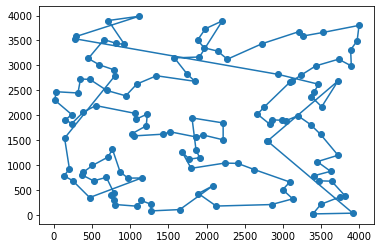

In [ ]:
x, y = zip(*list)

plt.plot(x, y) # 点列(x,y)を黒線で繋いだプロット
plt.scatter(x, y)
plt.show() # プロットを表示